#Tables and Graphs

Notebook created with the intention of creating the tables and graphs that will be presented in the paper.

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data_full <- read.csv("final_results_23_12_2022-22_13_14.csv",header = TRUE, sep = ",")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


In [ ]:
data <- data_full %>% select(-c(Predictions)) #Without the predictions

In [ ]:
head(data)

                                                                            
1 function (..., list = character(), package = NULL, lib.loc = NULL,        
2     verbose = getOption("verbose"), envir = .GlobalEnv, overwrite = TRUE) 
3 {                                                                         
4     fileExt <- function(x) {                                              
5         db <- grepl("\\\\.[^.]+\\\\.(gz|bz2|xz)$", x)                     
6         ans <- sub(".*\\\\.", "", x)                                      

In [ ]:
colnames(data)

[1] "X"              "Model"          "Configuration"  "t"             
[5] "Specifications" "MSE"            "Running.Time"

In [ ]:
data %>%
  group_by(Model)  %>%
    summarise(mean_mse = mean(MSE), mean_running.time = mean(Running.Time))

Model,mean_mse,mean_running.time
<chr>,<dbl>,<dbl>
GRU 1,0.04137774,104.364451
LSTM 1,0.04335852,116.546351
LSTM 2,0.03991185,119.721829
MLP 1,0.07370614,7.574485
RNN 1,0.04578931,39.265404


#Pruebas de Enrique

In [1]:
install.packages("ggrepel")
library(tidyverse)
library(ggrepel)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
datos = read.csv("final_results_23_12_2022-22_13_14.csv")
str(datos)
print(datos$Model)

'data.frame':	90 obs. of  8 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Model         : chr  "LSTM 1" "GRU 1" "LSTM 2" "RNN 1" ...
 $ Configuration : int  1 1 1 1 1 2 2 2 2 2 ...
 $ t             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Specifications: chr  "1 hidden nodes + 1 layers" "1 hidden nodes + 1 layers" "1 hidden nodes + 1  layers + 128" "1 hidden nodes + 1 layers" ...
 $ MSE           : num  0.00264 0.00769 0.00131 0.01324 0.05087 ...
 $ Running.Time  : num  1.918 1.577 3.558 1.097 0.426 ...
 $ Predictions   : chr  "[[0.42067959904670715], [0.4318043887615204], [0.41417187452316284], [0.3955976665019989], [0.3999122083187103]"| __truncated__ "[[0.437142938375473], [0.4655204713344574], [0.43364906311035156], [0.4331517815589905], [0.4310210347175598], "| __truncated__ "[[0.4139386713504791], [0.42252200841903687], [0.39517834782600403], [0.4058905839920044], [0.39827680587768555"| __truncated__ "[[0.49743154644966125], [0.441016286611557], [0.5359846353530884], [0.

In [4]:
#👉 Así más o menos deberían de venir los datos
datos_prueba = data.frame(t=1:100, 
                          real=runif(1:100),
                          modelo1=runif(1:100),
                          modelo2=runif(1:100),
                          modelo3=runif(1:100))
head(datos_prueba)

,t,real,modelo1,modelo2,modelo3
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.2582555,0.1876407,0.2398357,0.78167637
2,2,0.2649583,0.5357936,0.6208303,0.80817876
3,3,0.3271694,0.8597003,0.8725310,0.45621236
4,4,0.4515027,0.6982714,0.2073650,0.04378588
5,5,0.8543234,0.5678014,0.3587872,0.29227774
6,6,0.1292766,0.2488400,0.9235671,0.09388849


In [5]:
datos_prueba = datos_prueba %>%
  mutate(modelo1 = real-modelo1) %>%
  mutate(modelo2 = real-modelo2) %>%
  mutate(modelo3 = real-modelo3) %>%
  mutate(real = real-real) %>%
  pivot_longer(cols=-t)

head(datos_prueba)

datostexto = datos_prueba %>% filter(t == max(t))

t,name,value
<int>,<chr>,<dbl>
1,real,0.00000000
1,modelo1,0.07061479
1,modelo2,0.01841979
1,modelo3,-0.52342088
2,real,0.00000000
2,modelo1,-0.27083529


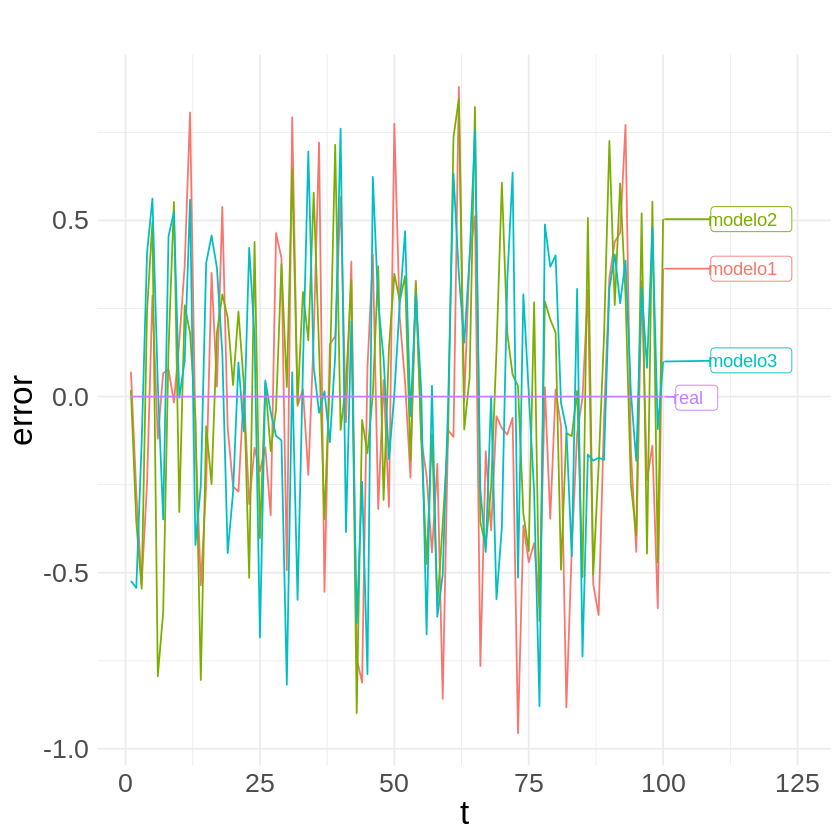

In [8]:
ggplot(datos_prueba, aes(x = t, y = value, col = name)) +  
  geom_line(size = 0.5) +
  guides(col = "none") + 
  geom_label_repel(data=datostexto, aes(x=t, y=value, col=name, label=name), hjust=-0.9) + 
  labs(x = "t", y = "error", title = "") +
  scale_x_continuous(limits = c(min(datos_prueba$t),1.25*max(datos_prueba$t))) +  
  theme_minimal() + 
  theme(text = element_text(size = 20))


#ggsave(xxxxxxxxxxxxxxxxxxxxxxxxxx)